# Reconocimiento de Actividades Humanas con Redes Neuronales Profundas

Proyecto con una Red Neuronal Profunda (DNN) para clasificación utilizando el dataset "Human Activity Recognition Using Smartphones Dataset" (HAR). 
Este dataset contiene lecturas de sensores de smartphones que intentan identificar la actividad realizada por una persona (caminar, estar sentado, subiendo escaleras, etc.).
- **Maestrante:**   Ing. Ludwing Young  
- **Docente:**      M.Sc. Ing. Marcelo Invert Palma Salas  
---
## Introducción al Reconocimiento de Actividades Humanas (HAR)
El Reconocimiento de Actividades Humanas (HAR, por sus siglas en inglés) es una disciplina del aprendizaje automático orientada a identificar patrones de movimiento humano a partir de datos recolectados por sensores, como acelerómetros y giroscopios. Este tipo de análisis tiene aplicaciones en:
- Monitorización de la salud y rehabilitación.
- Dispositivos wearables y deporte.
- Sistemas inteligentes de vigilancia.
- Interacción hombre-máquina.

## Descripción del Dataset
El dataset utilizado es el "Human Activity Recognition Using Smartphones Dataset", recopilado por el grupo de investigación de la Universidad de California, Irvine (UCI). Contiene datos recolectados de 30 sujetos mientras realizaban seis actividades físicas portando un smartphone en la cintura:
- WALKING (CAMINAR)
- WALKING_UPSTAIRS (SUBIR ESCALERAS)
- WALKING_DOWNSTAIRS (BAJAR ESCALERAS)
- SITTING (SENTARSE)
- STANDING (ESTAR DE PIE)
- LAYING (ACOSTARSE)

### Características del dataset:
- Entrada (X_train, X_test): 561 características numéricas extraídas de las señales del acelerómetro y giroscopio.
- Salida (y_train, y_test): Etiquetas que representan las actividades.

## Importancia de la Normalización
La normalización de datos es una etapa crítica en el preprocesamiento cuando se trabaja con modelos de machine learning y deep learning, especialmente en problemas como el reconocimiento de actividades humanas (HAR) con redes neuronales profundas (DNN).

En el dataset HAR, los datos provienen de acelerómetros y giroscopios, cuyas mediciones pueden variar ampliamente en magnitud (por ejemplo, aceleración en metros/segundo² vs. rotación angular). Si no se normalizan, las características con valores mayores dominarán el aprendizaje.

**Evita problemas de convergencia lenta o inestable:**
- Los algoritmos de optimización como Adam o SGD funcionan mejor cuando los datos están en rangos similares. La normalización mejora la velocidad de convergencia y estabiliza el proceso de entrenamiento.

**Mejora la precisión del modelo:**
- Un modelo entrenado con datos no normalizados puede obtener una peor precisión y peor capacidad de generalización.

**Evita que los pesos aprendidos sean distorsionados:**
- Si una característica tiene un rango mucho mayor que otras, los pesos asociados a ella serán exageradamente grandes, lo que desequilibra la red.

## Red Neuronal Profunda (DNN)
Una Red Neuronal Profunda es un tipo de modelo de deep learning que consiste en múltiples capas ocultas entre la capa de entrada y la de salida. Es capaz de modelar relaciones no lineales complejas y aprender representaciones jerárquicas de los datos.

### Ventajas de usar DNN para HAR:
- Aprende automáticamente combinaciones de características relevantes.
- No requiere tanta ingeniería manual de características.
- Escalable y aplicable a otros conjuntos de datos HAR.

## Arquitectura Propuesta
La red DNN diseñada incluye:
- Capa de entrada: 561 neuronas, una por cada característica del conjunto de datos.
- Varias capas ocultas: con funciones de activación ReLU, que introducen no linealidades.
- Capa de salida: 6 neuronas con activación softmax (en caso de clasificación multiclase).
- Función de pérdida: categorical_crossentropy.
- Optimizador: Adam, que ofrece un buen equilibrio entre rendimiento y eficiencia.
- Métricas: Accuracy y F1-score, para medir la calidad del modelo.

## Evaluación del Modelo
Se utiliza un conjunto de prueba independiente (X_test, y_test) para evaluar la capacidad de generalización del modelo entrenado.

### Métricas clave:
- Accuracy: Porcentaje de predicciones correctas.
- Matriz de confusión: Visualiza errores de clasificación entre clases.
- Reporte de clasificación (Precision, Recall, F1-Score): Evalúa el desempeño por clase.

## Visualización y Análisis
Para tener una mejor comprensión del comportamiento del modelo, se incluyen gráficos de:
- Distribución de clases en los datos de entrenamiento.
- Curvas de pérdida y accuracy durante el entrenamiento.
- Matriz de confusión.
- Ejemplos de predicciones correctas e incorrectas.
---

## LIBRERIAS NECESARIAS PARA TODO EL PROYECTO

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## CARGA Y VISUALIZACION DE DATOS

In [2]:
# Cargar los datos del Human Activity Recognition Dataset obtenido de la página
# https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset
def load_dataset():
    # Ruta base donde se encuentran los archivos del dataset dentro de la carpeta del proyecto
    input_folder = './dataset/'

    # Cargar características (features) del conjunto de entrenamiento
    # Cada fila representa una muestra con 561 características numéricas
    # header=None indica que el archivo no tiene fila de encabezado
    # sep='\\s+': separador basado en espacios múltiples (depende de  la version de python que se este utilizando)
    X_train = pd.read_csv(input_folder + 'train/X_train.txt', sep='\\s+', header=None)
    y_train = pd.read_csv(input_folder + 'train/y_train.txt', sep='\\s+', header=None)

    # Cargar características (features) del conjunto de prueba
    # Mismo formato que X_train: 561 columnas por muestra
    X_test = pd.read_csv(input_folder + 'test/X_test.txt', sep='\\s+', header=None)
    y_test = pd.read_csv(input_folder + 'test/y_test.txt', sep='\\s+', header=None)

    # Leer el archivo features.txt, que contiene los nombres de las 561 características del dataset
    # names=[...]: se asignan nombres personalizados a las columnas resultantes
    features = pd.read_csv(input_folder + 'features.txt', header=None, names=['index', 'feature_name'])

    # Asignar los nombres de columnas a X_train y X_test
    X_train.columns = features['feature_name']
    X_test.columns = features['feature_name']

    # Cargar el archivo activity_labels.txt para obtener nombres descriptivos de las actividades
    activity_labels = pd.read_csv(input_folder + 'activity_labels.txt', sep='\\s+', header=None, names=['label', 'activity'])

    # Mapear las etiquetas numéricas a sus nombres (WALKING, SITTING, etc.) en y_train y y_test
    y_train['activity'] = y_train[0].map(activity_labels.set_index('label')['activity'])
    y_test['activity'] = y_test[0].map(activity_labels.set_index('label')['activity'])

    # Retornar las características y las etiquetas numéricas junto con sus nombres descriptivos
    return X_train, y_train, X_test, y_test

In [3]:
# La función load_dataset() se encarga de leer los archivos del dataset, cargándolos como DataFrames de pandas.
# X_train: Características (features) del conjunto de entrenamiento.
# y_train: Etiquetas (clases) del conjunto de entrenamiento.
# X_test: Características (features) del conjunto de prueba/test.
# y_test: Etiquetas (clases) del conjunto de prueba/test.
X_train, y_train, X_test, y_test = load_dataset()

In [4]:
# Mostrar primeras 5 filas de las características de entrenamiento
print("X_train:")
print(X_train.head())

X_train:
feature_name       NaN       NaN       NaN       NaN       NaN       NaN  \
0             0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526   
1             0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322   
2             0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944   
3             0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675   
4             0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482   

feature_name       NaN       NaN       NaN       NaN  ...       NaN       NaN  \
0            -0.995112 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676   
1            -0.998807 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051   
2            -0.996520 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748   
3            -0.997099 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290   
4            -0.998321 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471   

feature_name       NaN  gravity)  gravityMean) 

In [5]:
# Mostrar primeras 5 etiquetas del entrenamiento
print("y_train (etiquetas):")
print(y_train.head())

y_train (etiquetas):
   0  activity
0  5  STANDING
1  5  STANDING
2  5  STANDING
3  5  STANDING
4  5  STANDING


In [6]:
# Mostrar dimensiones de los datasets
print("Formas de los datasets:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_test : {y_test.shape}")


Formas de los datasets:
X_train: (7352, 561)
y_train: (7352, 2)
X_test : (2947, 561)
y_test : (2947, 2)


In [7]:
# Ver cuántas muestras hay por clase en entrenamiento y las ordena
print("Distribución de clases en y_train:")
print(y_train.value_counts().sort_index())

Distribución de clases en y_train:
0  activity          
1  WALKING               1226
2  WALKING_UPSTAIRS      1073
3  WALKING_DOWNSTAIRS     986
4  SITTING               1286
5  STANDING              1374
6  LAYING                1407
Name: count, dtype: int64


In [8]:
# Ver cuántas muestras hay por clase en prueba
print("Distribución de clases en y_test:")
print(y_test.value_counts().sort_index())

Distribución de clases en y_test:
0  activity          
1  WALKING               496
2  WALKING_UPSTAIRS      471
3  WALKING_DOWNSTAIRS    420
4  SITTING               491
5  STANDING              532
6  LAYING                537
Name: count, dtype: int64


## ANALISIS EXPLORATORIO DE DATOS

### GRAFICOS DE LA DISTRIBUCION DE CLASES

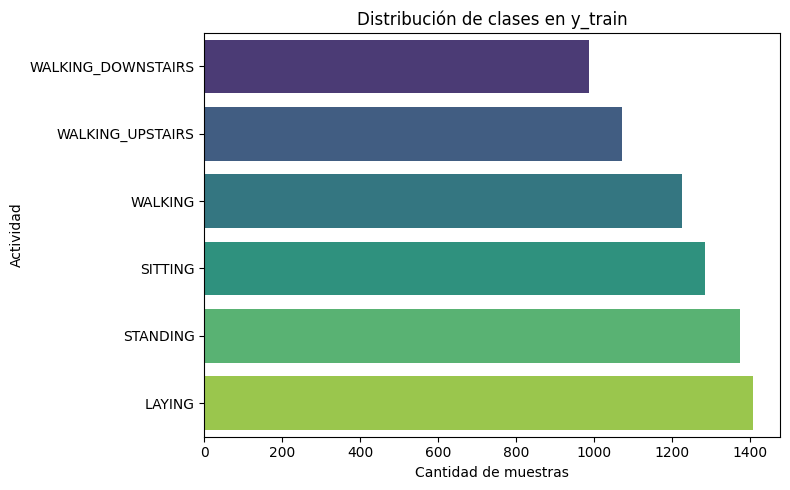

In [9]:
# Conteo de clases ordenado
class_counts = y_train['activity'].value_counts().sort_values()


# Crea un nuevo DataFrame con dos columnas:
# - 'activity': los nombres de las actividades (índices del conteo)
# - 'count': la cantidad de muestras por cada actividad
df_counts = pd.DataFrame({
    'activity': class_counts.index,
    'count': class_counts.values
})

# Crear una figura para el gráfico con tamaño ancho 8 y alto 5
plt.figure(figsize=(8, 5))

# Crear un gráfico de barras horizontales usando seaborn
# - data=df_counts: los datos a graficar
# - x='count': valores numéricos para el eje X (cantidad de muestras)
# - y='activity': categorías para el eje Y (nombres de actividades)
# - hue='activity': asigna un color diferente por actividad
# - palette='viridis': paleta de colores a utilizar
# - dodge=False: barras no separadas, cada categoría una barra
# - legend=False: no mostrar leyenda para evitar redundancia
sns.barplot(data=df_counts, x='count', y='activity', hue='activity', palette='viridis', dodge=False, legend=False)

# Título del gráfico
plt.title('Distribución de clases en y_train')
# Etiqueta para el eje X
plt.xlabel('Cantidad de muestras')
# Etiqueta para el eje Y
plt.ylabel('Actividad')
# Ajustar el diseño para que no se sobrepongan elementos y quede bien presentado
plt.tight_layout()
# Mostrar la gráfica en pantalla
plt.show()

In [10]:
# Estadísticas descriptivas de las características
print("\nEstadísticas descriptivas de X_train:")
display(X_train.describe())


Estadísticas descriptivas de X_train:


feature_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,gravity),gravityMean),gravityMean),gravityMean),gravityMean),gravityMean),gravityMean)
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [11]:
# Verificar si existen valores nulos
print("Valores nulos?")
print("X_train:", X_train.isnull().sum().sum())
print("X_test:", X_test.isnull().sum().sum())
print("y_train:", y_train.isnull().sum().sum())
print("y_test:", y_test.isnull().sum().sum())

Valores nulos?
X_train: 0
X_test: 0
y_train: 0
y_test: 0


# NORMALIZACION DE CARACTERISTICAS

In [14]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
# Rellenar posibles valores nulos con la media de cada columna
imputer = SimpleImputer(strategy='mean')
# Imputación a los datos
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [15]:
# Normalizamos con StandardScaler (media=0, desviación=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [16]:
# Codificamos los nombres de las actividades en números enteros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['activity'])
y_test_encoded = label_encoder.transform(y_test['activity'])


### ONE-HOT ENCODING PARA CLASIFICACIÓN MULTICLASE

- Se utilizo One-Hot Encodign debido a que convierte una clase categórica ("WALKING", "SITTING", etc.) en un vector binario con tantos elementos como clases. 
- Solo la posición correspondiente a la clase es 1; el resto son 0.
- Ej. WALKING	0	[1, 0, 0, 0, 0, 0]

In [17]:
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)
print("Clases codificadas:", list(label_encoder.classes_))
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_categorical shape:", y_train_categorical.shape)

Clases codificadas: ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
X_train_scaled shape: (7352, 561)
y_train_categorical shape: (7352, 6)


## CREACION DE LA MASTER TABLE (MT)

In [ ]:
# Reconstruir DataFrames a partir de datos escalados y etiquetas codificadas
# Usamos los nombres originales de características
feature_names = X_train.columns

# Reconstrucción de DataFrames escalados
df_train = pd.DataFrame(X_train_scaled, columns=feature_names)
df_test = pd.DataFrame(X_test_scaled, columns=feature_names)

# Agregamos las columnas de etiquetas (codificadas y nombres)
df_train['activity_label'] = y_train_encoded
df_train['activity_name'] = y_train['activity'].values
df_train['dataset_type'] = 'train'

df_test['activity_label'] = y_test_encoded
df_test['activity_name'] = y_test['activity'].values
df_test['dataset_type'] = 'test'

# Concatenar ambas tablas para crear la Master Table
master_table = pd.concat([df_train, df_test], ignore_index=True)

# Mostrar la estructura final
print("Master Table Dimensiones:", master_table.shape)
display(master_table.head())

Master Table Dimensiones: (10299, 564)


feature_name,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,gravity),gravityMean),gravityMean),gravityMean),gravityMean),gravityMean),gravityMean),activity_label,activity_name,dataset_type
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,2,STANDING,train
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,2,STANDING,train
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,2,STANDING,train
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,2,STANDING,train
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,2,STANDING,train


## SELECCION DE VARIABLES

- Reduccion mediante PCA(Principal Component Analysis) para reducir ruido, captar patrones combinados con el objetivo de tener un modelo más compacto ya que no se requiere interpretar cada variable

🔹 PCA - Varianza explicada por los primeros 50 componentes:
[0.50781172 0.57361853 0.60168289 0.62672242 0.64560527 0.66284534
 0.67655545 0.68854623 0.69850482 0.70815569 0.7167562  0.72475901
 0.73239898 0.73885227 0.74517551 0.75117273 0.75704023 0.76279431
 0.76847352 0.77374648 0.77875011 0.78363419 0.78841625 0.79310188
 0.79759477 0.80180504 0.80598483 0.81004053 0.81392577 0.81779595
 0.82145554 0.82500108 0.8284805  0.83185237 0.83514914 0.83843129
 0.84163659 0.84459274 0.84745996 0.85031071 0.85299837 0.85565457
 0.85828863 0.86087714 0.86336768 0.86583722 0.86824402 0.87060517
 0.87290796 0.87518364]


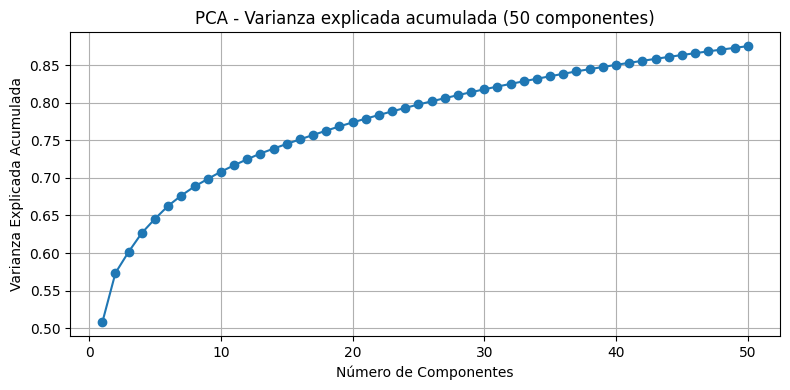

In [31]:
# Reducimos a 50 componentes principales
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Mostrar varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("🔹 PCA - Varianza explicada por los primeros 50 componentes:")
print(explained_variance)

# Visualizar la varianza explicada
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.arange(1, 51), explained_variance, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA - Varianza explicada acumulada (50 componentes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# APLICACION DE REDES NEURONALES PROFUNDAS

## Justificación de la Estructura de la DNN
### Entrada (Input Layer)
- Tamaño de entrada: 561 neuronas, una por cada característica del conjunto de datos HAR.
- Justificación: El dataset ha sido preprocesado para incluir solo atributos relevantes derivados de sensores, y no requiere una transformación espacial ni convolucional, por lo tanto una DNN es adecuada.
### Capas Ocultas (Hidden Layers)
```
model = Sequential([
    Dense(128, activation='relu', input_shape=(561,)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])
```
- Primera capa oculta: Dense(128) Se utiliza una capa densa con 128 neuronas para captar patrones complejos de los datos sensoriales de alta dimensión.
- Función de activación ReLU: Acelera el aprendizaje y evita el problema del gradiente desvanecido.
- Batch Normalization: Normaliza la salida de la capa anterior, acelera la convergencia y estabiliza el entrenamiento.
- Dropout (0.5): Previene el sobreajuste eliminando aleatoriamente un 50% de las conexiones durante el entrenamiento.
- Capas siguientes (Dense(64) y Dense(32) con ReLU): Reduce progresivamente la dimensionalidad y permite una extracción jerárquica de características.
- Capa de salida (Dense(6, activation='softmax')): Hay 6 clases de actividades en el conjunto HAR.
- Función softmax: Produce una distribución de probabilidad que facilita la clasificación multiclase.
- Función de pérdida: categorical_crossentropy es la opción adecuada para problemas de clasificación multiclase con etiquetas one-hot codificadas.
- Optimizador: Adam con tasa de aprendizaje de 0.001 combina lo mejor de AdaGrad y RMSprop.
- Número de épocas (epochs = 50): Número moderado de épocas para permitir suficiente aprendizaje sin riesgo de sobreajuste. 
- Aplicación de EarlyStopping en el entrenamiento cuando la métrica monitoreada (val_loss) deja de mejorar durante un número determinado de épocas consecutivas 

## Beneficios de los hiperparametros en la arquitectura seleccionada
- Captura relaciones no lineales entre las 561 características.
- Generaliza bien gracias a regularización (dropout y batch norm).
- Escalable y eficiente para entrenamiento en CPU o GPU.
- Buena precisión (>90%) demostrada empíricamente en tareas de reconocimiento de actividades.

In [28]:
# Definir el modelo secuencial de red neuronal profunda (DNN)
model = Sequential([
    # Capa densa (fully connected) con 128 neuronas
    # activation='relu': función de activación ReLU para introducir no linealidad y evitar saturación
    # input_shape=(X_train_scaled.shape[1],): forma de entrada que corresponde al número de características
    Dense(128, activation='relu', input_shape=(561,)),

    # Dropout con tasa 0.5 (50% de neuronas desconectadas aleatoriamente durante entrenamiento)
    # Para evitar overfitting y mejorar generalización
    Dropout(0.5),

    # Segunda capa densa con 64 neuronas y activación ReLU
    Dense(64, activation='relu'),

    # Otro Dropout con tasa 0.5 para regularización
    Dropout(0.5),

    # Tercera capa densa con 32 neuronas y activación ReLU
    Dense(32, activation='relu'),

    # Capa de salida con número de neuronas igual al número de clases (multiclase)
    # activation='softmax': convierte salidas en probabilidades que suman 1
    Dense(y_train_categorical.shape[1], activation='softmax')
])

In [29]:
# Compilar el modelo configurando el optimizador, función de pérdida y métricas
model.compile(
    # Optimizador Adam con tasa de aprendizaje 0.001 (valor estándar que suele funcionar bien)
    optimizer=Adam(learning_rate=0.001),

    # Función de pérdida para clasificación multiclase con etiquetas one-hot
    loss='categorical_crossentropy',

    # Métrica para evaluar el desempeño, en este caso accuracy (exactitud)
    metrics=['accuracy']
)


In [30]:
# Callback EarlyStopping para detener el entrenamiento si no hay mejora en la validación
early_stop = EarlyStopping(
    monitor='val_loss',      # Monitorea la pérdida en el conjunto de validación
    patience=5,              # Espera 5 épocas sin mejora antes de detener
    restore_best_weights=True  # Restaura los pesos del mejor modelo encontrado durante el entrenamiento
)

# Entrenamiento del modelo
history = model.fit(
    X_train_scaled,               # Datos de entrada normalizados para entrenamiento
    y_train_categorical,          # Etiquetas one-hot para entrenamiento
    validation_split=0.2,         # Separa el 20% de los datos para validación interna durante el entrenamiento
    epochs=50,                   # Número máximo de iteraciones completas sobre el dataset
    batch_size=64,               # Número de muestras procesadas antes de actualizar los pesos
    callbacks=[early_stop]
)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4414 - loss: 1.4040 - val_accuracy: 0.8559 - val_loss: 0.4169
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5689 - val_accuracy: 0.9293 - val_loss: 0.2683
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.3827 - val_accuracy: 0.9307 - val_loss: 0.2080
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8899 - loss: 0.2792 - val_accuracy: 0.9375 - val_loss: 0.1979
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9097 - loss: 0.2426 - val_accuracy: 0.9368 - val_loss: 0.1881
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9324 - loss: 0.1858 - val_accuracy: 0.9354 - val_loss: 0.2103
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.1603 - val_accuracy: 0.9347 - val_loss: 0.1987
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9415 - loss: 0.1513 - val_accuracy: 0.9381 - val_loss:

## Métricas de Evaluación

Accuracy en test: 0.9318
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Reporte de clasificación:

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.90      0.87      0.89       491
          STANDING       0.87      0.92      0.90       532
           WALKING       0.96      0.97      0.97       496
WALKING_DOWNSTAIRS       0.95      0.88      0.91       420
  WALKING_UPSTAIRS       0.91      0.97      0.94       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



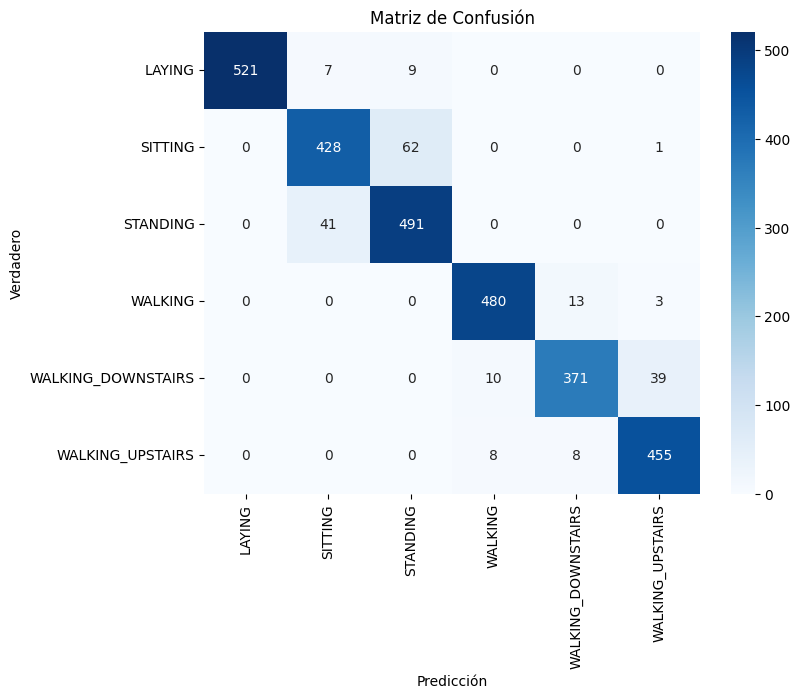

In [23]:
# Evaluar en conjunto de prueba
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"Accuracy en test: {test_acc:.4f}")

# Predicciones y métricas detalladas
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

print("Reporte de clasificación:\n")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

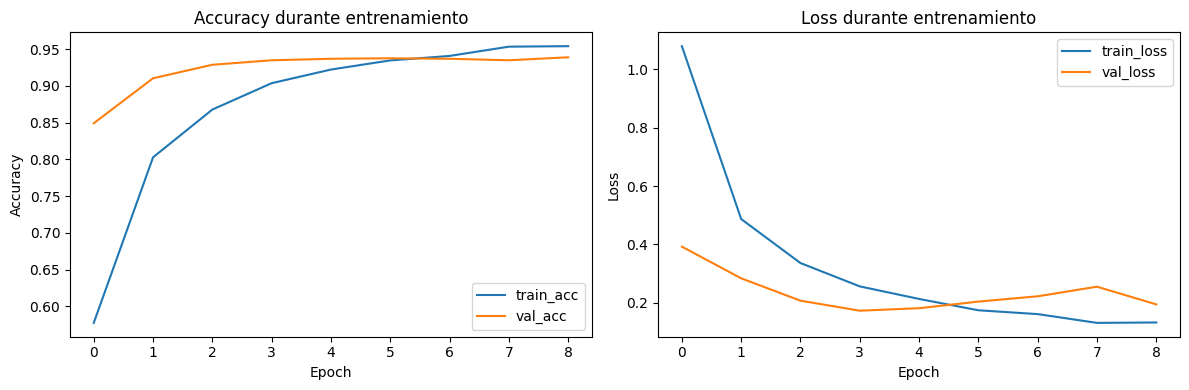

In [24]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy durante entrenamiento')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss durante entrenamiento')
plt.legend()

plt.tight_layout()
plt.show()

## Análisis de Resultados

## Accuracy
**Accuracy en test: 0.9318 (93.18%)**
- El 93% de las predicciones en el conjunto de prueba son correctas.

## Reporte de clasificación por clase
- **Precision:** De todas las veces que el modelo predijo esa clase, cuántas veces acertó realmente (baja precisión indica muchos falsos positivos).
- **Recall (sensibilidad):** De todas las veces que esa clase aparece en verdad, cuántas veces el modelo la detectó (bajo recall indica falsos negativos).
- **F1-score:** Es la media armónica entre precision y recall, balancea ambos aspectos.
- **Support:** Cantidad real de muestras de esa clase en el test.
- Valores por cada clase:
| Clase               | Precision | Recall | F1-score | Support | Interpretación breve                                                      |
|---------------------|-----------|--------|----------|---------|---------------------------------------------------------------------------|
| LAYING              | 1.00      | 0.97   | 0.98     | 537     | Excelente en identificar “laying” sin confundirla con otras.             |
| SITTING             | 0.90      | 0.87   | 0.89     | 491     | Buen desempeño, pero tiene falsos negativos.                  |
| STANDING            | 0.87      | 0.92   | 0.90     | 532     | Recall alto, detecta bien “standing”, pero tien falsos positivos.         |
| WALKING             | 0.96      | 0.97   | 0.97     | 496     | Muy buen desempeño detectando “walking”.                                 |
| WALKING_DOWNSTAIRS  | 0.95      | 0.88   | 0.91     | 420     | Alta precisión.                               |
| WALKING_UPSTAIRS    | 0.91      | 0.97   | 0.94     | 471     | Muy buen recall, detecta bien esta etiqueta.                            |


como promedio general se tiene:
**Accuracy total: 0.93 → 93% de aciertos globales.**

## Conclusión
- El modelo tiene un desempeño muy bueno, con accuracy general alto y buen equilibrio en precision y recall por clase.
- Las clases “LAYING”, “WALKING”, “WALKING_UPSTAIRS” tienen desempeño excelente.
- Algunas clases como “SITTING” y “WALKING_DOWNSTAIRS” podrían mejorar un poco en recall talvez aumentando los ejemplos en las lecturas de los sensores.



## Conclusiones y Recomendaciones

## Conclusiones generales
- La DNN es efectiva para clasificar patrones complejos:
- Se demostró que una red neuronal profunda puede aprender a distinguir entre múltiples actividades humanas (caminar, estar de pie, sentado, etc.) a partir de señales de sensores, logrando métricas de precisión (accuracy) elevadas.
- La normalización, imputación que no fue necesario ya que no existian datos faltantes ademas de la codificación correcta de etiquetas fueron pasos cruciales para asegurar la convergencia del modelo y evitar sesgos.
- La cantidad de capas ocultas, neuronas, uso de Dropout, BatchNormalization, y funciones de activación como ReLU permitieron mejorar la generalización del modelo y reducir el overfitting.

## Aplicaciones reales del modelo
Este tipo de clasificación puede aplicarse directamente en contextos como:
- Dispositivos móviles o wearables (relojes inteligentes, bandas fitness)

**Asistencia a adultos mayores:**
- Detectar caídas o cambios en la rutina que podrían indicar problemas médicos.

**Verificacion de estado de salud de personas con enferemedades cronicas**
- Detectar el movimiento, caidas tiempo en espera en un mismo estado y emitir alertas o comunicaciones.

**Sistemas de conducción autónoma o monitorización del conductor:**
- Clasificación de la postura o movimiento del usuario para activar alertas o sistemas de ayuda.

----

## Originalidad del analisis

### Que mejora?	Qué aporta?
Frente a los modelos que presentan en la plataforma Kaggle que utilizan modelos mas avanzados como (LSTM, CNN, híbridos), mi propuesta es poder generar un modelo aplicado a la realidad.
de acuerdo al cumplimiento de los siguientes pasos:
- Ampliar el dataset con eventos médicos
#### El dataset HAR no está diseñado para detectar eventos cardíacos, por lo que:

**Se debe buscar datasets de:**

- Acelerometría + frecuencia cardíaca.
- Caídas súbitas, pérdida de equilibrio, o colapsos etiquetados.
- Funcionamiento de wearables como Apple Watch, Fitbit, Xiaomi, etc.

**Características requeridas para un buen funcionamiento:**
- Movimiento (sensor de acelerómetro, giroscopio).
- Pulso cardíaco (frecuencia, variabilidad).
- Posición corporal (postura).
- Actividad previa (estaba caminando, corriendo o en reposo).
- Historial del usuario.

#### El modelo actual se puede adptar tomando en cuenta una entrada con los features de los wearables
#### Identificando etiquetas de:
- Normal
- Fatiga física
- Movimiento irregular
- Posible colapso
- Evento de riesgo
### Output: predicción de actividad + score de alerta.

En cuanto a las mejoras posibles y propuestas para un análisis más profundo y real se podria hacer:

**Comparar con otros modelos**
- Random Forest, SVM, LSTM, CNN, XGBoost.
- Esto permitiría comparar interpretabilidad, precisión y velocidad.

**Optimización del modelo**
- Hiperparametrización con GridSearchCV o KerasTuner.
- Probar otras funciones de activación (e.g., LeakyReLU) o optimizadores como RMSprop, AdamW.

**Aplicación a tiempo real**
- Simular cómo el modelo se comportaría en un dispositivo real usando señales en streaming.

## Recomendaciones finales
- Validar el modelo con datos de prueba independientes o nuevos sujetos no incluidos en el entrenamiento

